In [48]:
import pandas as pd 
import numpy as np
file_path = '/kaggle/input/laptop-price/laptop_price.csv'
laptops = pd.read_csv(file_path, encoding='ISO-8859-1')
laptops

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [49]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## Data Engineering

In [50]:
import re

def convert_memory_to_gb(memory_str):
    size_part = memory_str.split()[0]
    if 'TB' in size_part:
        return float(size_part.replace('TB', '')) * 1000
    else:
        return float(size_part.replace('GB', ''))
    


def calculate_pixels(resolution_str):
    numbers = re.findall(r'\d+', resolution_str)
    
    if len(numbers) >= 2:
        width, height = int(numbers[0]), int(numbers[1])
        return width * height
    else:
        return None
    
    
    
def extract_clock_speed(cpu_str):
    match = re.search(r'(\d+\.?\d*)GHz', cpu_str)
    if match:
        return float(match.group(1))
    else:
        match_mhz = re.search(r'(\d+\.?\d*)MHz', cpu_str)
        if match_mhz:
            return float(match_mhz.group(1)) / 1000
        else:
            return None
    
    
def enhanced_cpu_score(cpu_str):
    if 'i3' in cpu_str:
        base_score = 1
    elif 'i5' in cpu_str:
        base_score = 2
    elif 'i7' in cpu_str:
        base_score = 3
    elif 'i9' in cpu_str:
        base_score = 4
    elif 'Intel Core M' in cpu_str:
        base_score = 1.5
    elif 'AMD Ryzen' in cpu_str:
        base_score = 3  # Ryzen series generally offer high performance, but this can vary widely
    elif 'AMD A' in cpu_str:
        base_score = 1  # AMD A-Series are generally considered entry-level
    elif 'Intel Pentium' in cpu_str or 'Intel Celeron' in cpu_str:
        base_score = 0.5  # Generally lower performance
    elif 'Intel Xeon' in cpu_str:
        base_score = 3.5  # Xeon processors are high-end but vary widely
    elif 'AMD FX' in cpu_str:
        base_score = 2.5  # Positioning AMD FX series as mid- to high-range
    else:
        base_score = 0  # Unknown
    return base_score

In [51]:
laptops_8gb = laptops[laptops['Ram'] == '8GB'].copy()
# Convert 'Weight' to numeric by stripping 'kg' and converting to float
laptops_8gb['Weight'] = laptops_8gb['Weight'].str.replace('kg', '').astype(float)
# Apply the conversion function to the 'Memory' column
laptops_8gb['Memory_Size_GB'] = laptops_8gb['Memory'].apply(convert_memory_to_gb)
# Apply the function to the 'ScreenResolution' column
laptops_8gb['Total_Pixels'] = laptops_8gb['ScreenResolution'].apply(calculate_pixels)
# Apply the function to the 'Cpu' column
laptops_8gb['Cpu_Speed'] = laptops_8gb['Cpu'].apply(extract_clock_speed)
# Apply the function to the 'Cpu' column
laptops_8gb['Cpu_Series_Score'] = laptops_8gb['Cpu'].apply(enhanced_cpu_score)

In [52]:
laptops_8gb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 0 to 1295
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         619 non-null    int64  
 1   Company           619 non-null    object 
 2   Product           619 non-null    object 
 3   TypeName          619 non-null    object 
 4   Inches            619 non-null    float64
 5   ScreenResolution  619 non-null    object 
 6   Cpu               619 non-null    object 
 7   Ram               619 non-null    object 
 8   Memory            619 non-null    object 
 9   Gpu               619 non-null    object 
 10  OpSys             619 non-null    object 
 11  Weight            619 non-null    float64
 12  Price_euros       619 non-null    float64
 13  Memory_Size_GB    619 non-null    float64
 14  Total_Pixels      619 non-null    int64  
 15  Cpu_Speed         619 non-null    float64
 16  Cpu_Series_Score  619 non-null    float64
dtypes

In [53]:
print(laptops_8gb.shape)
laptops_8gb = laptops_8gb.sample(n=150, random_state=42)
laptops_8gb.reset_index(drop=True, inplace=True)
laptops_8gb

(619, 17)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Size_GB,Total_Pixels,Cpu_Speed,Cpu_Series_Score
0,97,Acer,Spin 5,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.50,847.0,256.0,2073600,1.6,2.0
1,1208,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,819.0,1000.0,2073600,2.5,2.0
2,174,Huawei,MateBook X,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.05,1349.0,256.0,3110400,2.5,2.0
3,602,Lenovo,IdeaPad 110-15ISK,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.29,459.0,1000.0,1049088,2.3,1.0
4,223,Dell,Latitude 5490,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,1149.0,256.0,2073600,1.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,661,MSI,GL62M 7REX,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,1191.8,128.0,2073600,2.8,3.0
146,178,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.50,923.0,256.0,2073600,1.6,2.0
147,532,Lenovo,ThinkPad L470,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,2.02,1340.0,256.0,2073600,2.3,2.0
148,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.26,1483.0,512.0,2073600,2.7,3.0


## AHP

In [54]:
criteria_df = laptops_8gb[['Cpu_Speed','Cpu_Series_Score', 'Total_Pixels', 'Memory_Size_GB', 'Inches', 'Weight', 'Price_euros']].copy()
criteria_df

,Cpu_Speed,Cpu_Series_Score,Total_Pixels,Memory_Size_GB,Inches,Weight,Price_euros
0,1.6,2.0,2073600,256.0,13.3,1.50,847.0
1,2.5,2.0,2073600,1000.0,15.6,2.40,819.0
2,2.5,2.0,3110400,256.0,13.0,1.05,1349.0
3,2.3,1.0,1049088,1000.0,15.6,2.29,459.0
4,1.6,2.0,2073600,256.0,14.0,1.60,1149.0
...,...,...,...,...,...,...,...
145,2.8,3.0,2073600,128.0,15.6,2.20,1191.8
146,1.6,2.0,2073600,256.0,17.3,2.50,923.0
147,2.3,2.0,2073600,256.0,14.0,2.02,1340.0
148,2.7,3.0,2073600,512.0,12.5,1.26,1483.0


#### Step 1: Read values from csv & Build comparison matrix

* CPU Speed is moderately more important than CPU Series Score (3).
* Total Pixels is strongly more important than CPU Speed and CPU Series Score (5).
* Memory Size is equally important as CPU Speed (1).
* Screen Size in Inches is moderately less important than Memory Size (1/3).
* Weight is moderately more important than Screen Size (3), assuming portability is key.
* Price is extremely more important than all other criteria (7), assuming budget is a primary concern.

In [55]:
# Number of criteria
n = criteria_df.shape[1]
# Import the CSV file as a DataFrame
comparison_df = pd.read_csv("/kaggle/input/comparison-matrix/comparison_matrix.csv", dtype=float)
comparison_df

,Cpu_Speed,Cpu_Series_Score,Total_Pixels,Memory_Size_GB,Inches,Weight,Price_euros
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,5.0,3.000000,0.000000,0.0,0.0,0.0,0.0
3,1.0,0.333333,0.200000,0.0,0.0,0.0,0.0
4,3.0,1.000000,0.333333,3.0,0.0,0.0,0.0
5,7.0,5.000000,3.000000,7.0,5.0,0.0,0.0
6,9.0,7.000000,5.000000,9.0,7.0,3.0,0.0


In [56]:
np.fill_diagonal(comparison_df.values, 1)
# Fill the upper triangle with the reciprocals of the lower triangle
for i in range(n):
    for j in range(i + 1, n):
        comparison_df.iloc[i, j] = 1 / comparison_df.iloc[j, i]
comparison_df

,Cpu_Speed,Cpu_Series_Score,Total_Pixels,Memory_Size_GB,Inches,Weight,Price_euros
0,1.0,0.333333,0.200000,1.0,0.333333,0.142857,0.111111
1,3.0,1.000000,0.333333,3.0,1.000000,0.200000,0.142857
2,5.0,3.000000,1.000000,5.0,3.000000,0.333333,0.200000
3,1.0,0.333333,0.200000,1.0,0.333333,0.142857,0.111111
4,3.0,1.000000,0.333333,3.0,1.000000,0.200000,0.142857
5,7.0,5.000000,3.000000,7.0,5.000000,1.000000,0.333333
6,9.0,7.000000,5.000000,9.0,7.000000,3.000000,1.000000


In [57]:
ri_df = pd.read_csv('/kaggle/input/ri-values/ri_values.csv')
ri_df

,Matrix size,Random consistency index (RI)
0,1,0.00
1,2,0.00
2,3,0.58
3,4,0.90
4,5,1.12
5,6,1.24
6,7,1.32
7,8,1.41
8,9,1.45
9,10,1.49


#### Step 2: Build Normalization Matrix

In [58]:
# Step 2: Normalize the pairwise comparison matrix
# Calculate the sum of each column
column_sums = comparison_df.sum(axis=0)
normalized_matrix = comparison_df.divide(column_sums, axis='columns')
normalized_matrix

,Cpu_Speed,Cpu_Series_Score,Total_Pixels,Memory_Size_GB,Inches,Weight,Price_euros
0,0.034483,0.018868,0.019868,0.034483,0.018868,0.028463,0.054432
1,0.103448,0.056604,0.033113,0.103448,0.056604,0.039848,0.069984
2,0.172414,0.169811,0.099338,0.172414,0.169811,0.066414,0.097978
3,0.034483,0.018868,0.019868,0.034483,0.018868,0.028463,0.054432
4,0.103448,0.056604,0.033113,0.103448,0.056604,0.039848,0.069984
5,0.241379,0.283019,0.298013,0.241379,0.283019,0.199241,0.163297
6,0.310345,0.396226,0.496689,0.310345,0.396226,0.597723,0.489891


#### Step 3: Build Weight Matrix

In [59]:
# Step 3: Calculate the priority vector using the eigenvector method
eigenvalues, eigenvectors = np.linalg.eig(comparison_df)
principal_eigen = eigenvalues.argmax()
priority_vector = np.real(eigenvectors[:, principal_eigen])
priority_vector = priority_vector / np.sum(priority_vector)  # Normalize

#### Step 4: Calculate AW for all Matrices

In [60]:
# Step 4: Calculate AW for all matrices
AW_vector = comparison_df.dot(priority_vector)

#### Step 5: Calculate λ,CI (Consistency Index)

In [61]:
# Calculate the maximum eigenvalue (λ_max) as the average of the AW vector divided by the priority vector
lambda_max = np.mean(AW_vector / priority_vector)

# Calculate the consistency index (CI)
CI = (lambda_max - n) / (n - 1)
print(f'The consistency index (CI) is: {CI}')

The consistency index (CI) is: 0.050735973747628726


#### Step 6: Extract RI from External Table

In [62]:
RI = ri_df.loc[ri_df['Matrix size'] == n, 'Random consistency index (RI)'].iloc[0]
print(f'Random consistency index (RI) is: {RI}')

Random consistency index (RI) is: 1.32


#### Step 7: Calculate CR

In [63]:
CR = CI / RI
print(f'The Consistency Ratio is: {CR}')
if CR<0.1:
    print('The model is consistent')
else:
    print('The model is not consistent')

The Consistency Ratio is: 0.03843634374820358
The model is consistent


#### Step 8: Calculate Global Score & Rank the alternatives

In [64]:
criteria_df_copy=criteria_df.copy()

criteria_df['Global_Score'] = criteria_df.dot(priority_vector)

# Sort the laptops based on their global scores in descending order (highest score first)
criteria_df.sort_values(by='Global_Score', ascending=False, inplace=True)

# Add a rank column based on the global score
criteria_df['AHP_Rank'] = criteria_df['Global_Score'].rank(ascending=False, method='min')
criteria_df

,Cpu_Speed,Cpu_Series_Score,Total_Pixels,Memory_Size_GB,Inches,Weight,Price_euros,Global_Score,AHP_Rank
92,1.6,2.0,5760000,256.0,13.3,1.23,1869.00,756776.634146,1.0
60,2.9,2.0,4096000,512.0,13.3,1.37,1958.90,538439.702091,2.0
27,1.2,2.0,3840000,256.0,12.3,1.10,1559.00,504658.451082,3.0
26,1.2,2.0,3840000,128.0,12.3,1.10,1275.00,504529.641245,4.0
118,2.6,3.0,3686400,256.0,14.0,1.50,1962.98,484678.258223,5.0
...,...,...,...,...,...,...,...,...,...
96,1.2,1.5,15360,240.0,12.5,1.09,3100.00,3389.941848,146.0
144,2.8,3.0,15360,256.0,15.6,1.78,2712.00,3219.922901,147.0
86,2.3,2.0,15360,256.0,15.6,2.04,2250.68,3016.624380,148.0
42,1.6,2.0,15360,256.0,13.3,1.29,1499.00,2685.039087,149.0


#### Trade-off/ Sensitivity Analysis

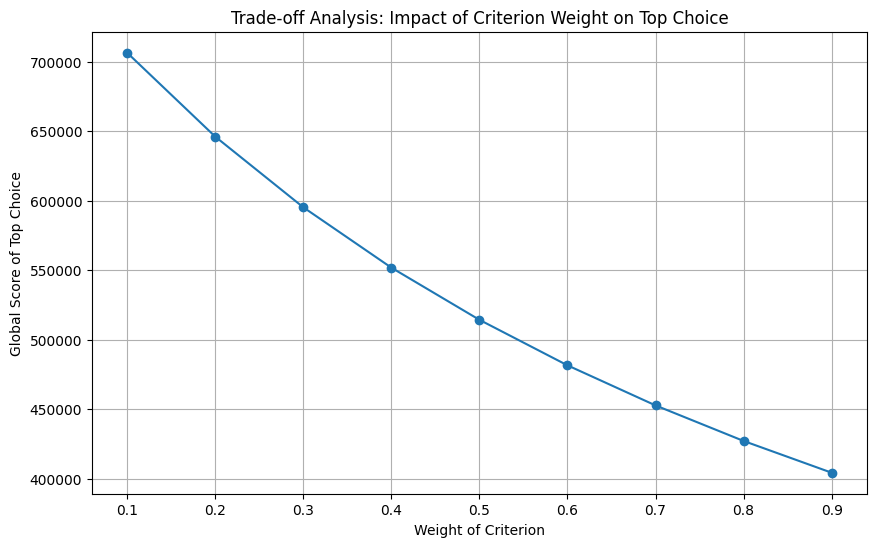

In [65]:
import matplotlib.pyplot as plt

# Choosing a range of values to adjust the weight of a specific criterion
weight_range = np.linspace(0.1, 0.9, 9)
top_choice = []
criteria_columns = ['Cpu_Speed', 'Cpu_Series_Score', 'Total_Pixels', 'Memory_Size_GB', 'Inches', 'Weight', 'Price_euros']

for weight in weight_range:
    # Adjusting the weight of a specific criterion
    new_priority_vector = np.copy(priority_vector)
    new_priority_vector[0] = weight
    new_priority_vector /= new_priority_vector.sum()  # Re-normalizing the priority vector
    
    # Recalculating global scores with the new weight
    criteria_df_copy['Adjusted_Global_Score'] = criteria_df_copy[criteria_columns].dot(new_priority_vector)
    # Finding the new top-ranked laptop
    top_choice.append(criteria_df_copy.loc[criteria_df_copy['Adjusted_Global_Score'].idxmax()])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(weight_range, [tc['Adjusted_Global_Score'] for tc in top_choice], marker='o')
plt.title('Trade-off Analysis: Impact of Criterion Weight on Top Choice')
plt.xlabel('Weight of Criterion')
plt.ylabel('Global Score of Top Choice')
plt.grid(True)
plt.show()


In [66]:
# Apply TOPSIS Method
# 1. Normalize the decision matrix (criteria_df)
# Exclude 'Global_Score' and 'Rank' columns for TOPSIS normalization
criteria_columns = criteria_df.columns.difference(['Global_Score', 'AHP_Rank'])
normalized_criteria_df = criteria_df[criteria_columns].div(np.sqrt((criteria_df[criteria_columns]**2).sum()))

# Proceed with weighting the normalized decision matrix using the AHP-derived priority vector
weighted_normalized_criteria_df = normalized_criteria_df.multiply(priority_vector, axis=1)


# 2. Weight the normalized decision matrix using AHP-derived priority_vector
weighted_normalized_criteria_df = normalized_criteria_df.multiply(priority_vector, axis=1)

# 3. Determine the ideal best and worst solutions
ideal_best = weighted_normalized_criteria_df.max()
ideal_worst = weighted_normalized_criteria_df.min()

# 4. Calculate the separation measures for each alternative
separation_from_best = np.sqrt(((weighted_normalized_criteria_df - ideal_best)**2).sum(axis=1))
separation_from_worst = np.sqrt(((weighted_normalized_criteria_df - ideal_worst)**2).sum(axis=1))

# 5. Calculate the relative closeness to the ideal solution
relative_closeness = separation_from_worst / (separation_from_best + separation_from_worst)

# 6. Assign TOPSIS scores and ranks to alternatives
criteria_df['TOPSIS_Score'] = relative_closeness
criteria_df['TOPSIS_Rank'] = criteria_df['TOPSIS_Score'].rank(ascending=False, method='min')

criteria_df

,Cpu_Speed,Cpu_Series_Score,Total_Pixels,Memory_Size_GB,Inches,Weight,Price_euros,Global_Score,AHP_Rank,TOPSIS_Score,TOPSIS_Rank
92,1.6,2.0,5760000,256.0,13.3,1.23,1869.00,756776.634146,1.0,0.563394,2.0
60,2.9,2.0,4096000,512.0,13.3,1.37,1958.90,538439.702091,2.0,0.484209,16.0
27,1.2,2.0,3840000,256.0,12.3,1.10,1559.00,504658.451082,3.0,0.429335,36.0
26,1.2,2.0,3840000,128.0,12.3,1.10,1275.00,504529.641245,4.0,0.426974,38.0
118,2.6,3.0,3686400,256.0,14.0,1.50,1962.98,484678.258223,5.0,0.465110,22.0
...,...,...,...,...,...,...,...,...,...,...,...
96,1.2,1.5,15360,240.0,12.5,1.09,3100.00,3389.941848,146.0,0.133764,149.0
144,2.8,3.0,15360,256.0,15.6,1.78,2712.00,3219.922901,147.0,0.225133,145.0
86,2.3,2.0,15360,256.0,15.6,2.04,2250.68,3016.624380,148.0,0.259715,142.0
42,1.6,2.0,15360,256.0,13.3,1.29,1499.00,2685.039087,149.0,0.105427,150.0


## Compare Rankings

In [67]:
import seaborn as sns
from scipy.stats import spearmanr

# Ranking Correlation
# Calculate Spearman's rank correlation
spearman_corr, _ = spearmanr(criteria_df['AHP_Rank'], criteria_df['TOPSIS_Rank'])
print(f"Spearman's Rank Correlation: {spearman_corr}")

# Rank Discrepancies
# Calculate discrepancies between rankings
criteria_df['Rank_Discrepancy'] = np.abs(criteria_df['AHP_Rank'] - criteria_df['TOPSIS_Rank'])

# Sort by largest discrepancies
discrepancies = criteria_df.sort_values(by='Rank_Discrepancy', ascending=False)

# Categorize discrepancies into 'Low', 'Medium', 'High'
criteria_df['Discrepancy_Category'] = pd.cut(criteria_df['Rank_Discrepancy'], 
                                             bins=[0, 3, 7, np.inf], 
                                             labels=['Low', 'Medium', 'High'])



# Display the DataFrame to check the new columns
print(criteria_df[['AHP_Rank', 'TOPSIS_Rank', 'Rank_Discrepancy', 'Discrepancy_Category']].head())

Spearman's Rank Correlation: 0.25026934578309395
     AHP_Rank  TOPSIS_Rank  Rank_Discrepancy Discrepancy_Category
92        1.0          2.0               1.0                  Low
60        2.0         16.0              14.0                 High
27        3.0         36.0              33.0                 High
26        4.0         38.0              34.0                 High
118       5.0         22.0              17.0                 High


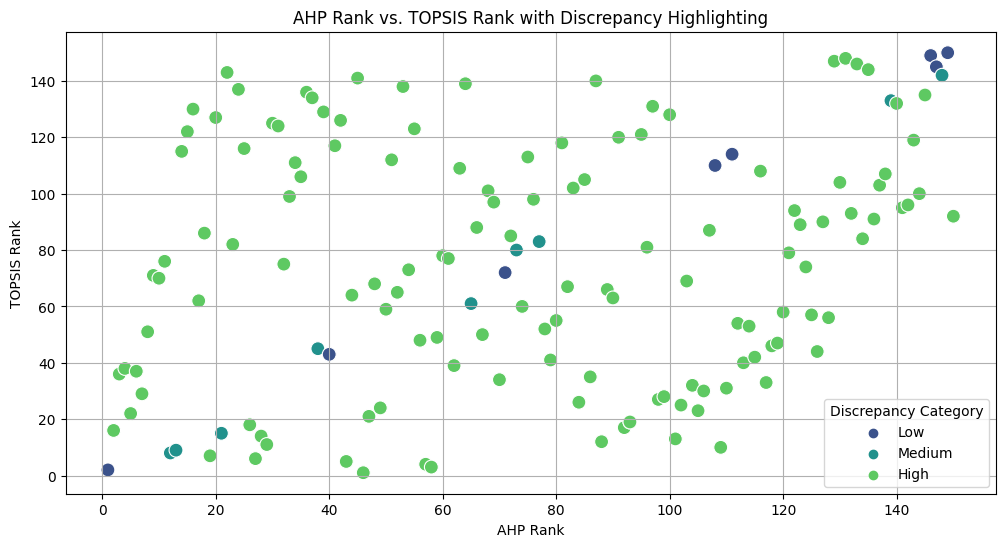

In [68]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AHP_Rank', y='TOPSIS_Rank', data=criteria_df, hue='Discrepancy_Category', s=100, palette='viridis')
plt.title('AHP Rank vs. TOPSIS Rank with Discrepancy Highlighting')
plt.xlabel('AHP Rank')
plt.ylabel('TOPSIS Rank')
plt.legend(title='Discrepancy Category')
plt.grid(True)
plt.show()

In [69]:
# Set seed for reproducibility
np.random.seed(0)

def perturb_priority_vector(priority_vector, noise_level=0.01):
    """Slightly perturbs the priority vector to simulate uncertainty."""
    noise = np.random.normal(0, noise_level, len(priority_vector))
    perturbed_vector = priority_vector + noise
    perturbed_vector /= perturbed_vector.sum()
    return perturbed_vector

def simulate_rankings(criteria_df, criteria_columns, priority_vector, iterations=1000):
    """Performs Monte Carlo simulation on rankings with perturbed priority vectors."""
    stability_results = []
    
    for _ in range(iterations):
        # Recalculate rankings with perturbed vector
        perturbed_vector = perturb_priority_vector(priority_vector)
        criteria_df['Perturbed_Global_Score'] = criteria_df[criteria_columns].dot(perturbed_vector)
        criteria_df['Perturbed_AHP_Rank'] = criteria_df['Perturbed_Global_Score'].rank(ascending=False, method='min')
        stability_results.append(criteria_df['Perturbed_AHP_Rank'].values)
        
    return np.array(stability_results)

# Execute Monte Carlo Simulation
stability_results = simulate_rankings(criteria_df_copy, criteria_columns, priority_vector)

# Calculate mean and standard deviation for each laptop's rank
mean_rank_stability = np.mean(stability_results, axis=0)
std_rank_stability = np.std(stability_results, axis=0)

# Calculate and display Kendall's Tau correlation
kendall_tau = stats.kendalltau(criteria_df['AHP_Rank'], criteria_df['TOPSIS_Rank'])[0]
print(f"Kendall's Tau correlation between AHP and TOPSIS ranks: {kendall_tau:.2f}")

# Create a DataFrame for plotting
stability_df = pd.DataFrame({'Laptop Index': np.arange(len(mean_rank_stability)) + 1,
                             'Mean Rank': mean_rank_stability, 
                             'Std Dev': std_rank_stability})

Kendall's Tau correlation between AHP and TOPSIS ranks: 0.18


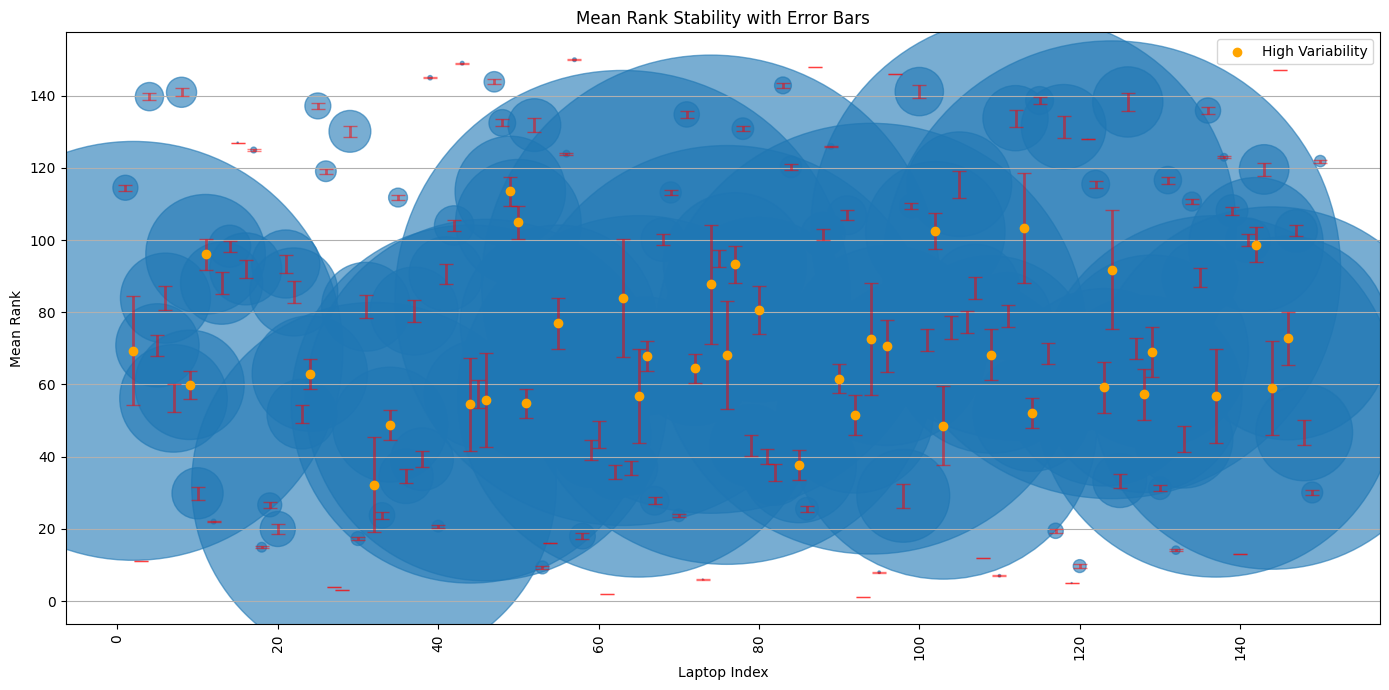

In [70]:
# Plotting mean rank stability with error bars
plt.figure(figsize=(14, 7))
# Emphasize points with larger standard deviations by adjusting the point size
point_sizes = (stability_df['Std Dev'] * 20) ** 2

# Create a scatter plot with varying point sizes
plt.scatter(stability_df['Laptop Index'], stability_df['Mean Rank'], s=point_sizes, alpha=0.6)

# Add error bars, slightly transparent to reduce visual clutter
plt.errorbar(stability_df['Laptop Index'], stability_df['Mean Rank'], yerr=stability_df['Std Dev'],
             fmt='none', ecolor='r', elinewidth=2, capsize=5, alpha=0.5)

# Highlighting laptops with high variability in rankings
high_variability = stability_df['Std Dev'] > np.percentile(stability_df['Std Dev'], 75)
plt.scatter(stability_df[high_variability]['Laptop Index'], stability_df[high_variability]['Mean Rank'], 
            color='orange', label='High Variability', zorder=5)

plt.title('Mean Rank Stability with Error Bars')
plt.xlabel('Laptop Index')
plt.ylabel('Mean Rank')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()